# Introduction to Statsmodels

## Normal Distribution Test with Q-Q plots

In [1]:
%matplotlib inline

from statsmodels.graphics.api import qqplot
import numpy as np

np.random.seed(0)

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
pd.set_option('display.max_rows', 2)
pd.set_option('display.max_columns', 7)

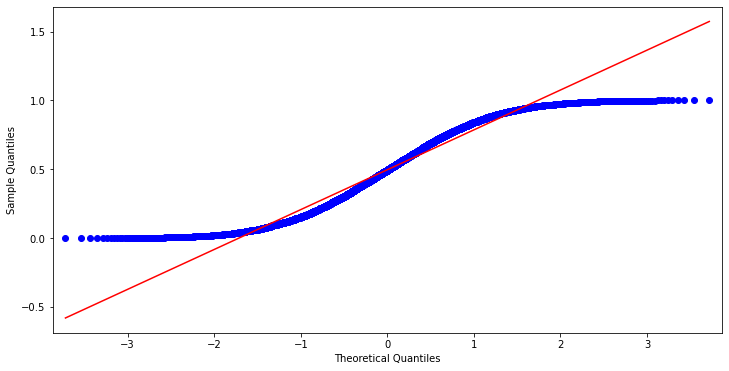

In [2]:
fig = qqplot(np.random.uniform(size=10000), line='s')
fig.set_size_inches(12, 6)

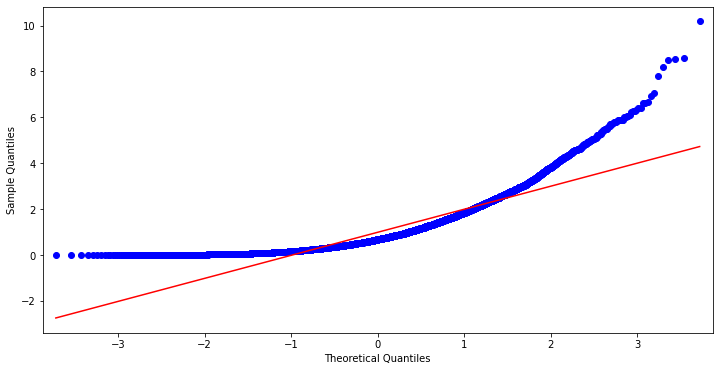

In [3]:
fig = qqplot(np.random.exponential(size=10000), line='s')
fig.set_size_inches(12, 6)

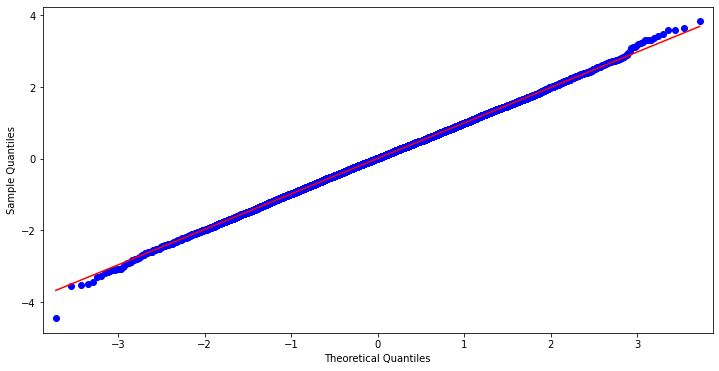

In [4]:
fig = qqplot(np.random.normal(size=10000), line='s')
fig.set_size_inches(12, 6)

## Time Series Analysis with Statsmodels

In [5]:
import statsmodels.api as sm

In [6]:
sm.tsa.datetools.dates_from_range('2010', length=12)

[datetime.datetime(2010, 12, 31, 0, 0),
 datetime.datetime(2011, 12, 31, 0, 0),
 datetime.datetime(2012, 12, 31, 0, 0),
 datetime.datetime(2013, 12, 31, 0, 0),
 datetime.datetime(2014, 12, 31, 0, 0),
 datetime.datetime(2015, 12, 31, 0, 0),
 datetime.datetime(2016, 12, 31, 0, 0),
 datetime.datetime(2017, 12, 31, 0, 0),
 datetime.datetime(2018, 12, 31, 0, 0),
 datetime.datetime(2019, 12, 31, 0, 0),
 datetime.datetime(2020, 12, 31, 0, 0),
 datetime.datetime(2021, 12, 31, 0, 0)]

In [7]:
sm.tsa.datetools.dates_from_range('2010m1', length=120)

[datetime.datetime(2010, 1, 31, 0, 0),
 datetime.datetime(2010, 2, 28, 0, 0),
 datetime.datetime(2010, 3, 31, 0, 0),
 datetime.datetime(2010, 4, 30, 0, 0),
 datetime.datetime(2010, 5, 31, 0, 0),
 datetime.datetime(2010, 6, 30, 0, 0),
 datetime.datetime(2010, 7, 31, 0, 0),
 datetime.datetime(2010, 8, 31, 0, 0),
 datetime.datetime(2010, 9, 30, 0, 0),
 datetime.datetime(2010, 10, 31, 0, 0),
 datetime.datetime(2010, 11, 30, 0, 0),
 datetime.datetime(2010, 12, 31, 0, 0),
 datetime.datetime(2011, 1, 31, 0, 0),
 datetime.datetime(2011, 2, 28, 0, 0),
 datetime.datetime(2011, 3, 31, 0, 0),
 datetime.datetime(2011, 4, 30, 0, 0),
 datetime.datetime(2011, 5, 31, 0, 0),
 datetime.datetime(2011, 6, 30, 0, 0),
 datetime.datetime(2011, 7, 31, 0, 0),
 datetime.datetime(2011, 8, 31, 0, 0),
 datetime.datetime(2011, 9, 30, 0, 0),
 datetime.datetime(2011, 10, 31, 0, 0),
 datetime.datetime(2011, 11, 30, 0, 0),
 datetime.datetime(2011, 12, 31, 0, 0),
 datetime.datetime(2012, 1, 31, 0, 0),
 datetime.datetime(

## Error, Trend, Seasonality (ETS) Analysis of a Time Series

In [8]:
import pandas as pd
pd.set_option('display.max_columns', 7)

n_obs = 12 * 20
linear_trend = np.linspace(100, 200, num=n_obs)
cycle = np.sin(linear_trend) * 10
error_noise = np.random.randn(n_obs)
dataset = pd.DataFrame(linear_trend + cycle + error_noise,
                       index=sm.tsa.datetools.dates_from_range('2000m1', length=n_obs),
                      columns=['Price'])
dataset

,Price
2000-01-31,95.434035
...,...
2019-12-31,190.440912


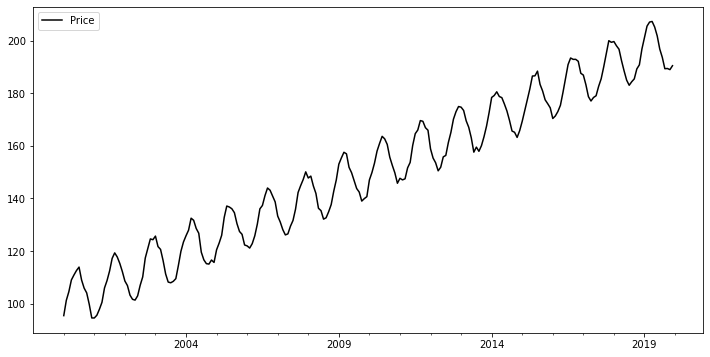

In [9]:
import matplotlib.pyplot as plt
dataset.plot(figsize=(12, 6), color='black')

### The Hodrick-Prescott filter

In [10]:
hp_cycle, hp_trend = sm.tsa.filters.hpfilter(dataset['Price'], lamb=129600)
decomp = dataset[['Price']]
decomp['HP_Cycle'] = hp_cycle
decomp['HP_Trend'] = hp_trend
decomp

,Price,HP_Cycle,HP_Trend
2000-01-31,95.434035,-6.028019,101.462054
...,...,...,...
2019-12-31,190.440912,-8.183495,198.624407


### UnobservedComponents model

In [11]:
uc = sm.tsa.UnobservedComponents(dataset['Price'], level='lltrend', cycle=True, stochastic_cycle=True)
res_uc = uc.fit(method='powell', disp=True)
res_uc.summary()

Optimization terminated successfully.
         Current function value: 1.970063
         Iterations: 5
         Function evaluations: 425


<class 'statsmodels.iolib.summary.Summary'>
"""
                        Unobserved Components Results                         
==============================================================================
Dep. Variable:                  Price   No. Observations:                  240
Model:             local linear trend   Log Likelihood                -472.815
                   + stochastic cycle   AIC                            955.630
Date:                Sat, 20 Mar 2021   BIC                            972.949
Time:                        13:51:32   HQIC                           962.612
Sample:                    01-31-2000                                         
                         - 12-31-2019                                         
Covariance Type:                  opg                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
sigma2.irregular     0.2989      0.205      1.461      0.144      -0.102       0.700
sigma2.level      1.176e-15      0.085   1.38e-14      1.000      -0.167       0.167
sigma2.trend      1.463e-21   2.43e-05   6.03e-17      1.000   -4.76e-05    4.76e-05
sigma2.cycle         1.6486      0.520      3.170      0.002       0.629       2.668
frequency.cycle      0.3491      0.012     28.568      0.000       0.325       0.373
===================================================================================
Ljung-Box (Q):                      341.98   Jarque-Bera (JB):                 2.24
Prob(Q):                              0.00   Prob(JB):                         0.33
Heteroskedasticity (H):               0.87   Skew:                            -0.18
Prob(H) (two-sided):                  0.55   Kurtosis:                         2.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [12]:
decomp['UC_Cycle'] = res_uc.cycle.smoothed
decomp['UC_Trend'] = res_uc.level.smoothed
decomp['UC_Error'] = res_uc.resid
decomp

,Price,HP_Cycle,HP_Trend,UC_Cycle,UC_Trend,UC_Error
2000-01-31,95.434035,-6.028019,101.462054,-4.228669,99.858992,95.434035
...,...,...,...,...,...,...
2019-12-31,190.440912,-8.183495,198.624407,-9.686873,200.074732,0.521774


### statsmodels.tsa.seasonal.seasonal_decompose(...) method

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose
s_dc = seasonal_decompose(dataset['Price'], model='additive')
decomp['SDC_Cycle'] = s_dc.seasonal
decomp['SDC_Trend'] = s_dc.trend
decomp['SDC_Error'] = s_dc.resid
decomp[118:122]

,Price,HP_Cycle,HP_Trend,...,SDC_Cycle,SDC_Trend,SDC_Error
2009-11-30,139.909827,-9.505316,149.415142,...,0.538702,147.232624,-7.861499
...,...,...,...,...,...,...,...
2010-02-28,149.827204,-0.854788,150.681992,...,0.181072,150.787911,-1.141779


### Plotting of the Results of Hodrick-Prescott filter, the UnobservedComponents model and the seasonal_decompose method

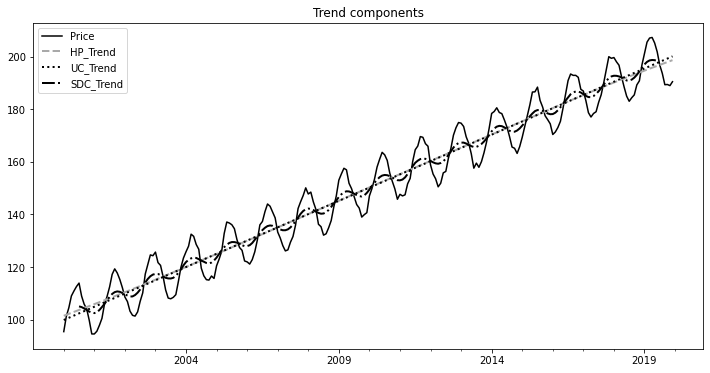

In [14]:
plt.title('Trend components')
decomp['Price'].plot(figsize=(12, 6), color='black', linestyle='-', legend='Price')
decomp['HP_Trend'].plot(figsize=(12, 6), color='darkgray', linestyle='--', lw=2, legend='HP_Trend')
decomp['UC_Trend'].plot(figsize=(12, 6), color='black', linestyle=':', lw=2, legend='UC_Trend')
decomp['SDC_Trend'].plot(figsize=(12, 6), color='black', linestyle='-.', lw=2, legend='SDC_Trend')

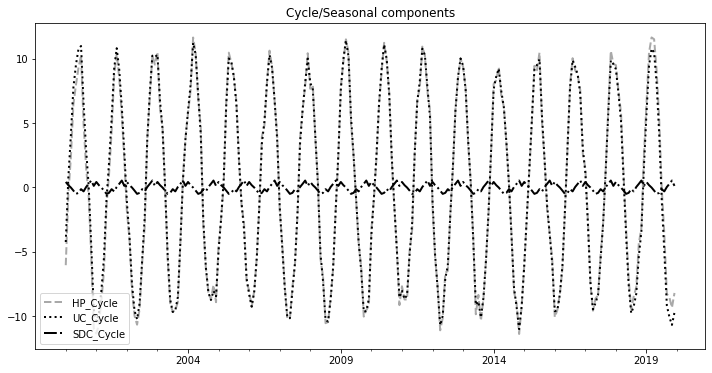

In [15]:
plt.title('Cycle/Seasonal components')
decomp['HP_Cycle'].plot(figsize=(12, 6), color='darkgray', linestyle='--', lw=2, legend='HP_Cycle')
decomp['UC_Cycle'].plot(figsize=(12, 6), color='black', linestyle=':', lw=2, legend='UC_Cycle')
decomp['SDC_Cycle'].plot(figsize=(12, 6), color='black', linestyle='-.', lw=2, legend='SDC_Cycle')

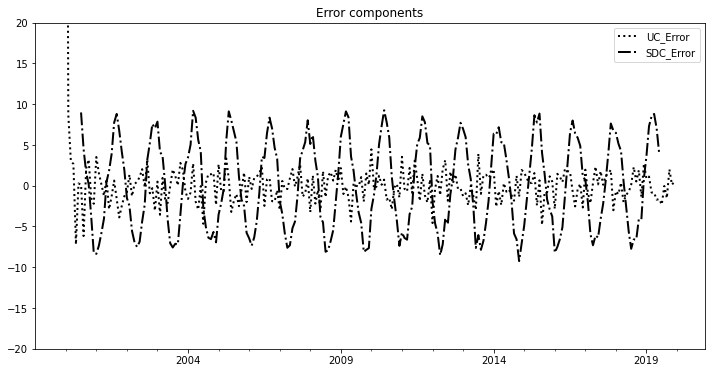

In [16]:
plt.title('Error components')
plt.ylim((-20, 20))
decomp['UC_Error'].plot(figsize=(12, 6), color='black', linestyle=':', lw=2, legend='UC_Error')
decomp['SDC_Error'].plot(figsize=(12, 6), color='black', linestyle='-.', lw=2, legend='SDC_Error')

## Augmented Dickey–Fuller Test for Stationarity of a Time Series

### Step 1 - Augmented Dickey-Fuller (ADF) test on the Prices

In [17]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(dataset['Price'])
print('Test Stat: {}\np value: {}\nLags: {}\nNum observations: {}'.format(result[0], result[1], result[2], result[3]))

Test Stat: -0.1077979503038736
p value: 0.948656267082022
Lags: 15
Num observations: 224


### Step 2 - First Differencing on Prices

In [18]:
price_diff = (dataset['Price'].shift(-1) - dataset['Price']).fillna(0)
price_diff

2000-01-31    5.791736
                ...   
2019-12-31    0.000000
Name: Price, Length: 240, dtype: float64

### Step 3 - Augmented Dickey-Fuller (ADF) test on the Differenced Prices

In [19]:
result = adfuller(price_diff)
print('Test Stat: {}\np value: {}\nLags: {}\nNum observations: {}'.format(result[0], result[1], result[2], result[3]))

Test Stat: -10.284319697138253
p value: 3.7090433175393265e-18
Lags: 15
Num observations: 224


## Autocorrelation and Partial Autocorrelation of a Time Series

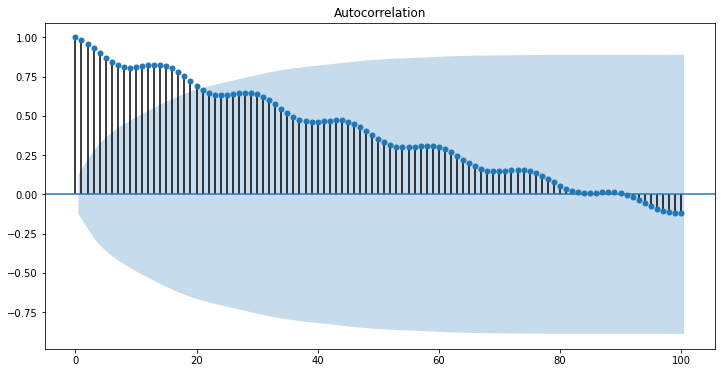

In [20]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig = plot_acf(dataset['Price'], lags=100)
fig.set_size_inches(12, 6)

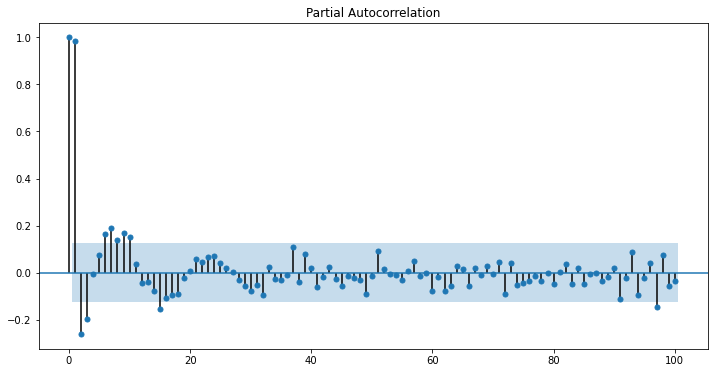

In [21]:
fig = plot_pacf(dataset['Price'], lags=100)
fig.set_size_inches(12, 6)

## Auto-Regressive Integrated Moving Average (ARIMA) Time Series Model with Statsmodels

In [22]:
from statsmodels.tsa.arima.model import ARIMA
arima = ARIMA(dataset['Price'], order=(36,1,2))
res_ar = arima.fit()
res_ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Price   No. Observations:                  240
Model:                ARIMA(36, 1, 2)   Log Likelihood                -364.013
Date:                Sat, 20 Mar 2021   AIC                            806.026
Time:                        13:51:46   BIC                            941.608
Sample:                    01-31-2000   HQIC                           860.662
                         - 12-31-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7426     29.922     -0.025      0.980     -59.388      57.903
ar.L2         -0.5528     17.169     -0.032      0.974     -34.203      33.098
ar.L3         -0.4853     13.932     -0.035      0.972     -27.792      26.822
ar.L4         -0.4974     12.344     -0.040      0.968     -24.691      23.696
ar.L5         -0.3893     12.929     -0.030      0.976     -25.730      24.951
ar.L6         -0.2633      9.576     -0.027      0.978     -19.031      18.504
ar.L7         -0.2727      6.375     -0.043      0.966     -12.767      12.221
ar.L8         -0.4255      7.167     -0.059      0.953     -14.474      13.622
ar.L9         -0.4760     11.579     -0.041      0.967     -23.170      22.217
ar.L10        -0.4116     12.346     -0.033      0.973     -24.610      23.786
ar.L11        -0.3562     10.336     -0.034      0.973     -20.615      19.902
ar.L12        -0.3758      9.030     -0.042      0.967     -18.075      17.323
ar.L13        -0.2476      9.823     -0.025      0.980     -19.501      19.006
ar.L14        -0.0552      5.833     -0.009      0.992     -11.487      11.377
ar.L15        -0.0674      0.782     -0.086      0.931      -1.601       1.466
ar.L16         0.0276      1.938      0.014      0.989      -3.770       3.826
ar.L17         0.1561      1.161      0.134      0.893      -2.119       2.432
ar.L18         0.2111      4.474      0.047      0.962      -8.559       8.981
ar.L19         0.3412      5.623      0.061      0.952     -10.680      11.363
ar.L20         0.2065      9.346      0.022      0.982     -18.111      18.524
ar.L21         0.1642      4.686      0.035      0.972      -9.020       9.349
ar.L22         0.2316      4.235      0.055      0.956      -8.069       8.532
ar.L23         0.2246      6.272      0.036      0.971     -12.068      12.517
ar.L24         0.3223      5.718      0.056      0.955     -10.886      11.530
ar.L25         0.4112      8.740      0.047      0.962     -16.719      17.541
ar.L26         0.4470     10.876      0.041      0.967     -20.869      21.763
ar.L27         0.4786     11.629      0.041      0.967     -22.314      23.271
ar.L28         0.4567     12.465      0.037      0.971     -23.974      24.887
ar.L29         0.4175     11.664      0.036      0.971     -22.443      23.278
ar.L30         0.4254     10.629      0.040      0.968     -20.408      21.258
ar.L31         0.4597     11.045      0.042      0.967     -21.189      22.108
ar.L32         0.4023     11.984      0.034      0.973     -23.087      23.891
ar.L33         0.3896     10.091      0.039      0.969     -19.387      20.167
ar.L34         0.4572     10.042      0.046      0.964     -19.224      20.139
ar.L35         0.3123     12.062      0.026      0.979     -23.328      23.953
ar.L36         0.0390      7.372      0.005      0.996     -14.409      14.487
ma.L1          0.0596     29.942      0.002      0.998     -58.627      58.746
ma.L2         -0.0284      3.279     -0.009      0.993      -6.455       6.398
si

In [23]:
dataset['PredPrice'] = res_ar.predict(dataset.index[0], dataset.index[-1])
dataset

,Price,PredPrice
2000-01-31,95.434035,0.000000
...,...,...
2019-12-31,190.440912,190.843301


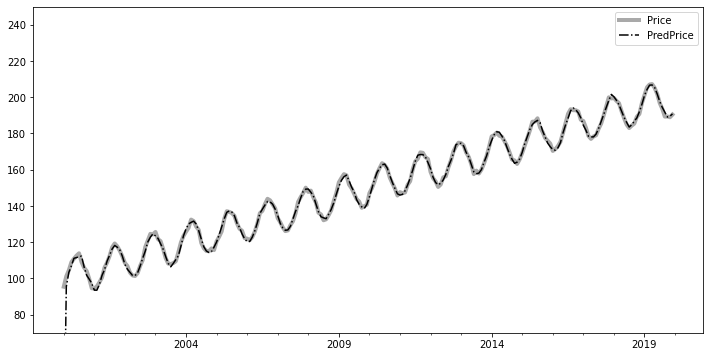

In [24]:
plt.ylim(70, 250)
dataset['Price'].plot(figsize=(12, 6), color='darkgray', linestyle='-', lw=4, legend='Price')
dataset['PredPrice'].plot(figsize=(12, 6), color='black', linestyle='-.', legend='PredPrice')

In [25]:
extended_dataset = pd.DataFrame(index=sm.tsa.datetools.dates_from_range('2020m1', length=48))
extended_dataset = dataset.append(extended_dataset)
extended_dataset

,PredPrice,Price
2000-01-31,0.0,95.434035
...,...,...
2023-12-31,NaN,NaN


In [26]:
extended_dataset['PredPrice'] = res_ar.predict(extended_dataset.index[0], extended_dataset.index[-1])
extended_dataset

,PredPrice,Price
2000-01-31,0.000000,95.434035
...,...,...
2023-12-31,219.411391,NaN


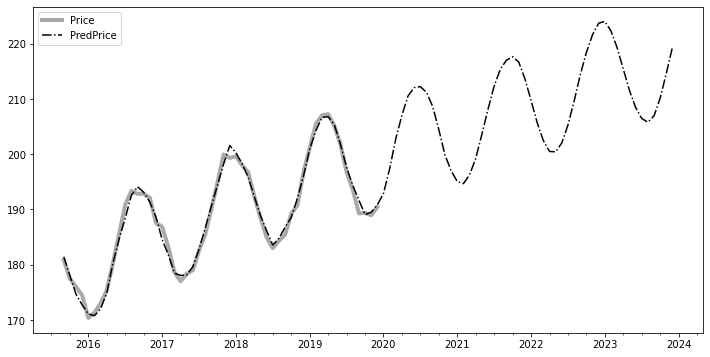

In [27]:
extended_dataset['Price'].iloc[-100:].plot(figsize=(12, 6), color='darkgray', linestyle='-', lw=4, legend='Price')
extended_dataset['PredPrice'].iloc[-100:].plot(figsize=(12, 6), color='black', linestyle='-.', legend='PredPrice')

# Seasonal Auto-Regressive Integrated Moving Average with Exogenous Variables (SARIMAX) Time Series Model with pmdarima

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  240
Model:               SARIMAX(4, 1, 2)   Log Likelihood                -392.059
Date:                Sat, 20 Mar 2021   AIC                            800.119
Time:                        13:52:31   BIC                            827.930
Sample:                             0   HQIC                           811.326
                                - 240                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1222      0.013      9.356      0.000       0.097       0.148
ar.L1          1.2502      0.096     13.059      0.000       1.063       1.438
ar.L2         -0.0985      0.135     -0.732      0.4

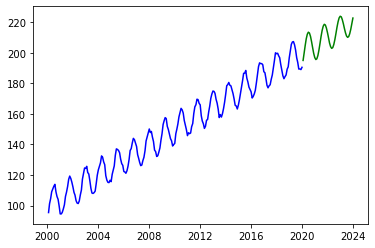

             PredPrice
2020-01-31  194.939195
...                ...
2023-12-31  222.660698

[48 rows x 1 columns]
[[192.39868933 197.4797007 ]
 [196.80033117 202.32443987]
 [201.6275806  207.60042584]
 [205.9618426  212.0364167 ]
 [209.033287   215.10916543]
 [210.32110852 216.51409374]
 [209.62157171 216.15129243]
 [207.17614834 214.17358638]
 [203.5449316  210.97194759]
 [199.46843725 207.15990646]
 [195.71297089 203.48784368]
 [192.93690459 200.71195929]
 [191.59865512 199.44554143]
 [191.91786083 200.01804896]
 [193.8725229  202.39121103]
 [197.19909023 206.17818497]
 [201.40637337 210.75008268]
 [205.83536749 215.37564375]
 [209.7663694  219.35717394]
 [212.55128912 222.14242091]
 [213.7451047  223.39641969]
 [213.20540324 223.0299918 ]
 [211.12424917 221.19972997]
 [207.97687762 218.29089147]
 [204.41019058 214.8734485 ]
 [201.1104803  211.61987613]
 [198.68170291 209.19110574]
 [197.55523041 208.1105787 ]
 [197.94057987 208.65380175]
 [199.81030498 210.78686819]
 [202.90637588 

In [28]:
import pmdarima as pm
model = pm.auto_arima(dataset['Price'], seasonal=True, stepwise=True, m=12)
print(model.summary())

extended_dataset = pd.DataFrame(index=sm.tsa.datetools.dates_from_range('2020m1', length=48))

extended_dataset['PredPrice'], conf_int = model.predict(48, return_conf_int=True, alpha=0.05)

plt.plot(dataset['Price'], c='blue')
plt.plot(extended_dataset['PredPrice'], c='green')
plt.show()
print(extended_dataset)
print(conf_int)

# Time Series Forecasting Using Facebook’s Prophet

            ds           y
0   2000-01-31   95.434035
..         ...         ...
239 2019-12-31  190.440912

[240 rows x 2 columns]


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


            ds        yhat  yhat_lower  yhat_upper
283 2023-08-31  217.394516  208.340574  226.340332
..         ...         ...         ...         ...
287 2023-12-31  219.414306  209.761076  228.938440

[5 rows x 4 columns]


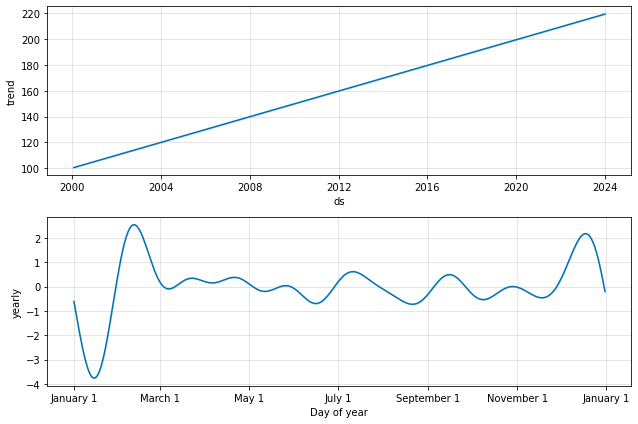

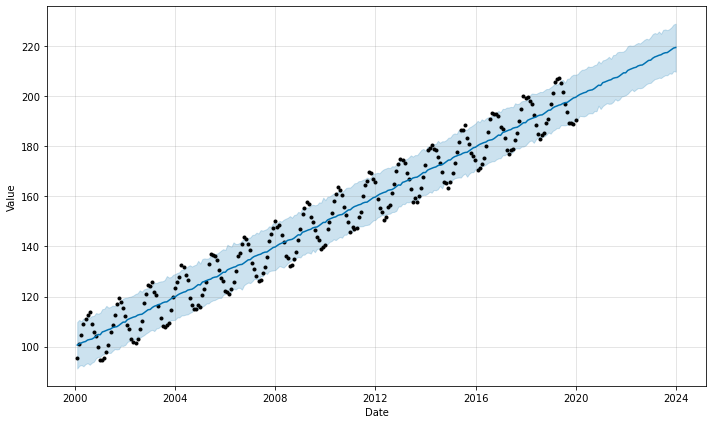

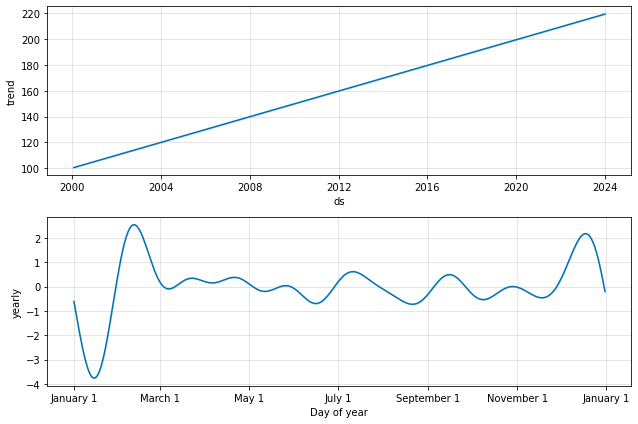

In [29]:
from fbprophet import Prophet

prophet_dataset = dataset.rename(columns={'Price' : 'y'}).rename_axis('ds').drop('PredPrice', 1).reset_index()

print(prophet_dataset)
model = Prophet()
model.fit(prophet_dataset)
df_forecast = model.make_future_dataframe(periods=48, freq='M')
df_forecast = model.predict(df_forecast)
print(df_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())
model.plot(df_forecast, xlabel='Date', ylabel='Value')
model.plot_components(df_forecast)